# Age Segmentation for Sepsis Survival Prediction

**Code authored by**: Shawhin Talebi <br>
**Article link**: https://medium.com/@shawhin/2-next-level-uses-of-decision-trees-80f60b3c61d9 <br>
**Data source**: 
- UCI: https://archive.ics.uci.edu/ml/datasets/Sepsis+survival+minimal+clinical+records
- Chicco, D., Jurman, G. Survival prediction of patients with sepsis from age, sex, and septic episode number alone. Sci Rep 10, 17156 (2020). https://doi.org/10.1038/s41598-020-73558-3

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree

### Data prep

In [2]:
df = pd.read_csv('raw/s41598-020-73558-3_sepsis_survival_primary_cohort.csv')

#### Data Prep

In [3]:
# keep only age and sepsis survival flag
df = df.iloc[:,[0,3]]

# group data by age and compute percent alive for each age value
df_byAge = (df.groupby(by=df.columns[0]).sum()/df.groupby(by=df.columns[0]).count())
df_byAge.columns = ['percent_alive']
df_byAge['percent_not_alive'] = 1 - df_byAge['percent_alive']

df_byAge = df_byAge.reset_index()
df_byAge

age_years  percent_alive  percent_not_alive
0            0       0.991824           0.008176
1            1       0.992579           0.007421
2            2       0.998839           0.001161
3            3       0.996711           0.003289
4            4       1.000000           0.000000
..         ...            ...                ...
96          96       0.867742           0.132258
97          97       0.792035           0.207965
98          98       0.814371           0.185629
99          99       0.797619           0.202381
100        100       0.828125           0.171875

[101 rows x 3 columns]

In [4]:
# define predictor and target variable names
X_var_name = df_byAge.columns[0]
y_var_name = df_byAge.columns[2]

# create predictor and target arrays
X = df_byAge[X_var_name]
y = df_byAge[y_var_name]

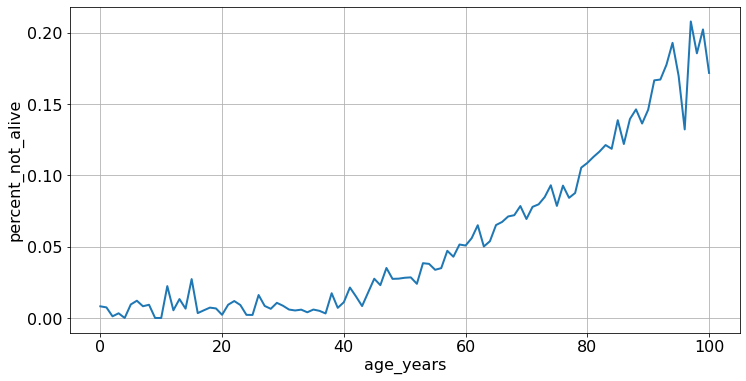

In [5]:
plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 16})

plt.plot(y, linewidth=2)
plt.grid()
plt.xlabel(X_var_name)
plt.ylabel(y_var_name)
plt.savefig('visuals/use-2_'+y_var_name+'-vs-'+X_var_name+'.png',facecolor='white',bbox_inches="tight")

In [6]:
# # optional: adjust age domain
# max_age = 95
# X = X.iloc[:max_age]
# y = y.iloc[:max_age]
# min_age = 18
# X = X.iloc[min_age:]
# y = y.iloc[min_age:]

### Decision tree

In [7]:
# define number of bins (i.e. age buckets)
num_bins = 4

# train model
clf = tree.DecisionTreeRegressor(random_state=42, max_leaf_nodes=num_bins)
clf = clf.fit(X.to_numpy().reshape(-1, 1), y)

##### Display decision tree

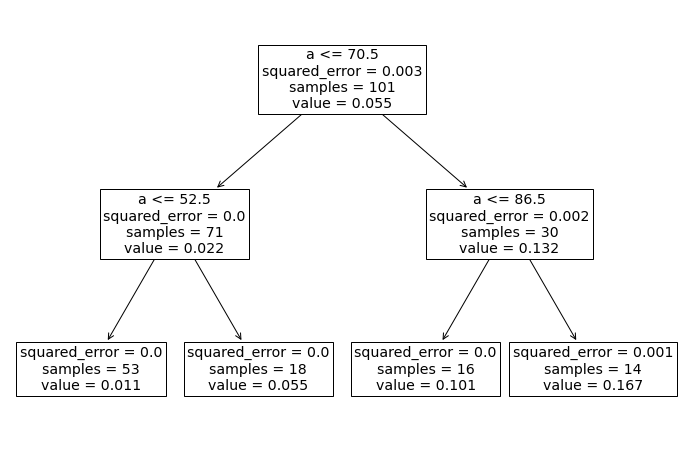

In [8]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf, feature_names=X_var_name)
plt.savefig('visuals/fully_grown_decision_tree.png',facecolor='white',bbox_inches="tight")
plt.show()

##### Traverse tree and return split values

In [9]:
# variables creation
num_nodes = clf.tree_.node_count
left_child = clf.tree_.children_left
right_child = clf.tree_.children_right
threshold = clf.tree_.threshold

# list to store the bin edges
bin_edge_list = [X[0],X[len(X)-1]]

# loop through all the nodes
for i in range(num_nodes):
    # If the left and right child of a node is not the same(-1) we have an internal node
    # which we will append to bin_node list
    if left_child[i]!=right_child[i]:
        bin_edge_list.append(np.round(threshold[i],1))

# sort the nodes in increasing order
bin_edge_list.sort()

# create dictionary to store epoch bin edges
bin_dict = {}

# put in each dictionary index 2 consecutive bin edges
for i in range(num_bins):
    bin_dict[str(i+1)] = [bin_edge_list[i], bin_edge_list[i+1]]

##### Plot bin edges

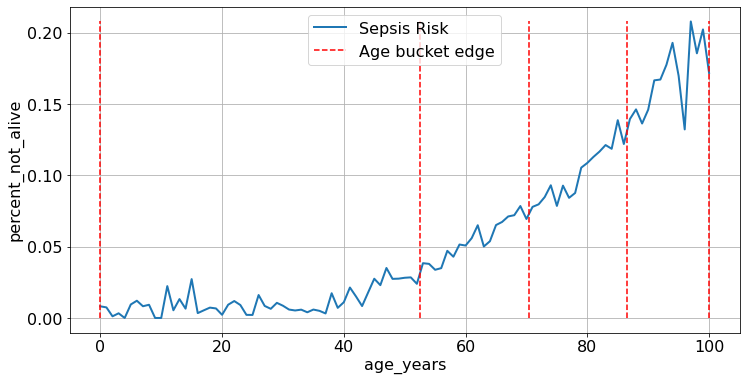

In [10]:
plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 16})

plt.plot(y, linewidth=2)
plt.grid()
plt.xlabel(X_var_name)
plt.ylabel(y_var_name)

for bin_edge in bin_edge_list:
    plt.plot([bin_edge, bin_edge], [0, max(y)], 'r--')
    

plt.legend(['Sepsis Risk', 'Age bucket edge'], loc='upper center')
    
plt.savefig('visuals/use-2_'+y_var_name+'-vs-'+X_var_name+'_with_'+str(num_bins)+'-bins.png',facecolor='white',bbox_inches="tight")